In [43]:
import pandas as pd

# Importing the CSV file
df = pd.read_csv('query_edited.csv')

print (df)

                          time   latitude   longitude     depth   mag  \
0     2023-11-07T06:20:27.627Z  31.656000 -104.315000    5.1385  1.80   
1     2023-11-07T06:05:57.453Z  57.453300 -156.518300   95.3000  1.80   
2     2023-11-07T06:01:38.598Z  60.330900 -152.133300  100.1000  2.10   
3     2023-11-07T05:53:22.960Z  17.978500  -66.908500   12.6500  2.38   
4     2023-11-07T05:52:33.912Z -23.153100  -67.889900  169.0080  4.20   
...                        ...        ...         ...       ...   ...   
4705  2023-10-08T00:39:56.690Z  38.686667 -122.498667    6.2600  1.84   
4706  2023-10-08T00:27:24.440Z  19.127001 -155.393829   31.6800  1.92   
4707  2023-10-08T00:22:55.530Z  19.251167 -155.405334   29.4000  2.10   
4708  2023-10-08T00:19:30.004Z  -5.577000  146.201200   81.5920  4.50   
4709  2023-10-08T00:17:47.340Z  17.913667  -66.923833   14.9800  2.73   

                                        place locationSource  
0                               western Texas             tx

In [44]:
# # Removing the rows with missing values
df.dropna


<bound method DataFrame.dropna of                           time   latitude   longitude     depth   mag  \
0     2023-11-07T06:20:27.627Z  31.656000 -104.315000    5.1385  1.80   
1     2023-11-07T06:05:57.453Z  57.453300 -156.518300   95.3000  1.80   
2     2023-11-07T06:01:38.598Z  60.330900 -152.133300  100.1000  2.10   
3     2023-11-07T05:53:22.960Z  17.978500  -66.908500   12.6500  2.38   
4     2023-11-07T05:52:33.912Z -23.153100  -67.889900  169.0080  4.20   
...                        ...        ...         ...       ...   ...   
4705  2023-10-08T00:39:56.690Z  38.686667 -122.498667    6.2600  1.84   
4706  2023-10-08T00:27:24.440Z  19.127001 -155.393829   31.6800  1.92   
4707  2023-10-08T00:22:55.530Z  19.251167 -155.405334   29.4000  2.10   
4708  2023-10-08T00:19:30.004Z  -5.577000  146.201200   81.5920  4.50   
4709  2023-10-08T00:17:47.340Z  17.913667  -66.923833   14.9800  2.73   

                                        place locationSource  
0                         

In [45]:
# Rounding off the data to to given decimal places in different columns

column_name1 = 'latitude'
column_name2 = 'longitude'
column_name3 = 'depth'
column_name4 = 'mag'
df[column_name1] = df[column_name1].round(3)
df[column_name2] = df[column_name2].round(3)
df[column_name3] = df[column_name3].round(2)
df[column_name4] = df[column_name4].round(2)

In [46]:
# Handling Outliers

lower_bound4 = 0
upper_bound4 = 10

# Identify Outliers
outliers = (df[column_name4] < lower_bound4) | (df[column_name4] > upper_bound4)
# Removing Outliers 
df_no_outliers = df[~outliers]


lower_bound3 = 0
upper_bound3 = 700
outliers = (df[column_name3] < lower_bound3) | (df[column_name3] > upper_bound3)
df_no_outliers = df[~outliers]


In [47]:
# Making a new feature as Zone

# Step 1: Calculate the frequency for each locationSource
frequency_counts = df['locationSource'].value_counts()

# Step 2: Create a new feature 'zone' based on the specified conditions
df['zone'] = df['locationSource'].apply(lambda x: 'red' if frequency_counts[x] > 350 else ('yellow' if 100 <= frequency_counts[x] <= 350 else 'green'))


In [48]:
print(df.dtypes)

time               object
latitude          float64
longitude         float64
depth             float64
mag               float64
place              object
locationSource     object
zone               object
dtype: object


In [49]:
print(df)

                          time  latitude  longitude   depth   mag  \
0     2023-11-07T06:20:27.627Z    31.656   -104.315    5.14  1.80   
1     2023-11-07T06:05:57.453Z    57.453   -156.518   95.30  1.80   
2     2023-11-07T06:01:38.598Z    60.331   -152.133  100.10  2.10   
3     2023-11-07T05:53:22.960Z    17.978    -66.908   12.65  2.38   
4     2023-11-07T05:52:33.912Z   -23.153    -67.890  169.01  4.20   
...                        ...       ...        ...     ...   ...   
4705  2023-10-08T00:39:56.690Z    38.687   -122.499    6.26  1.84   
4706  2023-10-08T00:27:24.440Z    19.127   -155.394   31.68  1.92   
4707  2023-10-08T00:22:55.530Z    19.251   -155.405   29.40  2.10   
4708  2023-10-08T00:19:30.004Z    -5.577    146.201   81.59  4.50   
4709  2023-10-08T00:17:47.340Z    17.914    -66.924   14.98  2.73   

                                        place locationSource    zone  
0                               western Texas             tx     red  
1                  53 km E of

In [50]:
# Finding the seismic zones for different locations

unique_zones = df[['locationSource', 'zone']].drop_duplicates()

# Print the result
print(unique_zones.to_string(index=False))  

locationSource   zone
            tx    red
            ak    red
            pr yellow
            us    red
            hv    red
            ci yellow
            nc yellow
            uu  green
            nn yellow
            mb  green
            ok  green
            uw  green
            nm  green
            av yellow
            se  green


In [51]:
# Making an interactive World Map UI where user can browse the seismic zones along with their locations on the world map

import folium
from IPython.display import display

# Create a Folium Map centered at a location of your choice
world_map = folium.Map(location=[20, 0], zoom_start=2)  # Adjust the center of the map as needed

# Dictionary of places, their coordinates, and corresponding colors
places_data = {
    'texas': {'coordinates': (31.9686, -99.9018), 'color': 'red'},
    'alaska': {'coordinates': (61.0169, -149.7375), 'color': 'red'},
    'puerto rico': {'coordinates': (18.2208, -66.5901), 'color': 'orange'},
    'uzbekistan': {'coordinates': (41.3775, 64.5853), 'color': 'red'},
    'hawaii': {'coordinates': (20.7967, -156.3319), 'color': 'red'},
    'canada': {'coordinates': (56.1304, -106.3468), 'color': 'orange'},
    'california': {'coordinates': (36.7783, -119.4179), 'color': 'orange'},
    'utah': {'coordinates': (39.3200, -111.0937), 'color': 'green'},
    'south carolina': {'coordinates': (33.8361, -81.1637), 'color': 'orange'},
    'oklahoma': {'coordinates': (35.4676, -97.5164), 'color': 'green'},
    'new mexico': {'coordinates': (34.5199, -105.8701), 'color': 'green'},
    'alabama': {'coordinates': (32.8067, -86.7911), 'color': 'orange'},
    'south carolina_2': {'coordinates': (33.8361, -81.1637), 'color': 'green'},
    'delhi': {'coordinates': (28.6139, 77.2090), 'color': 'orange'},  # Delhi coordinates
}

# Add markers for each place with specified colors and names
for place, data in places_data.items():
    folium.Marker(
        location=data['coordinates'],
        popup=f'<strong>{place}</strong>',
        tooltip=folium.Tooltip(text=place),
        icon=folium.Icon(color=data['color'])
    ).add_to(world_map)

# Display the map inline
display(world_map)


In [52]:
# Separate time series data
latitude_series = df['latitude']
longitude_series = df['longitude']
mag_series = pd.to_numeric(df['mag'], errors='coerce')  # Convert to numeric, handle errors by setting to NaN
depth_series = pd.to_numeric(df['depth'], errors='coerce')  # Convert to numeric, handle errors by setting to NaN
location_source_series = df['locationSource']

# Function to fit ARIMA model and make predictions
def fit_arima_and_forecast(series, order=(1, 1, 1)):
    model = ARIMA(series, order=order)
    fit = model.fit()
    forecast = fit.get_forecast(steps=1)
    predicted_value = forecast.predicted_mean.values[0]
    return predicted_value

# Make predictions for latitude, longitude, mag, and depth
predicted_latitude = fit_arima_and_forecast(latitude_series)
predicted_longitude = fit_arima_and_forecast(longitude_series)
predicted_mag = fit_arima_and_forecast(mag_series)
predicted_depth = fit_arima_and_forecast(depth_series)

# Print predicted values
print(f'Predicted Latitude: {predicted_latitude:.4f}')
print(f'Predicted Longitude: {predicted_longitude:.4f}')
print(f'Predicted Magnitude: {predicted_mag:.4f}')
print(f'Predicted Depth: {predicted_depth:.4f}')

# Predict the most frequent locationSource
predicted_location_source = location_source_series.mode().iloc[0]
print(f'Predicted LocationSource: {predicted_location_source}')

Predicted Latitude: 32.4564
Predicted Longitude: -96.0227
Predicted Magnitude: 2.5985
Predicted Depth: 37.7020
Predicted LocationSource: ak


In [37]:
# Displaying the predicted location on the world map

import folium
from IPython.display import display, HTML

# Create a Folium Map centered at the predicted location
prediction_map = folium.Map(location=[predicted_latitude, predicted_longitude], zoom_start=10)

# Add a marker for the predicted location
folium.Marker(location=[predicted_latitude, predicted_longitude], popup='Predicted Location').add_to(prediction_map)

# Display the map within the notebook
display(prediction_map)

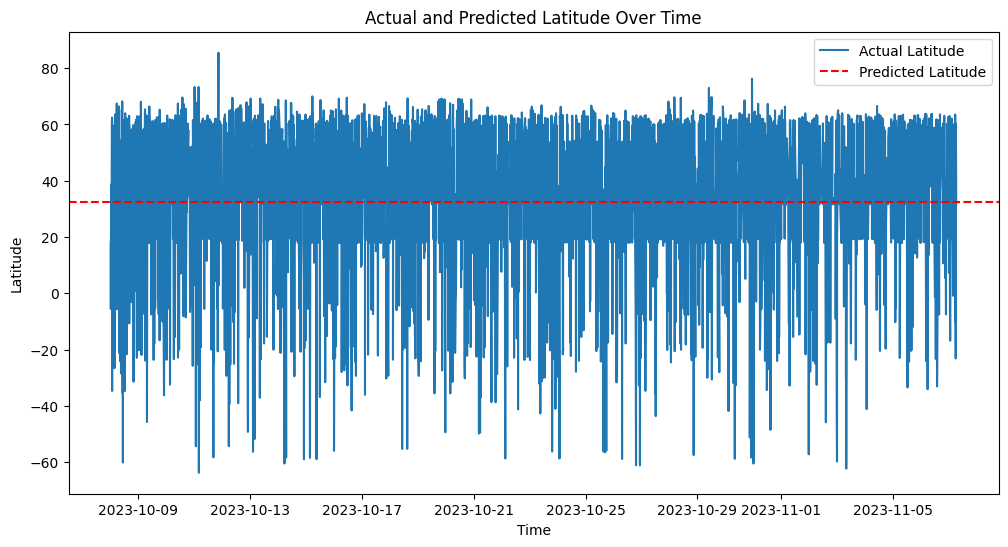

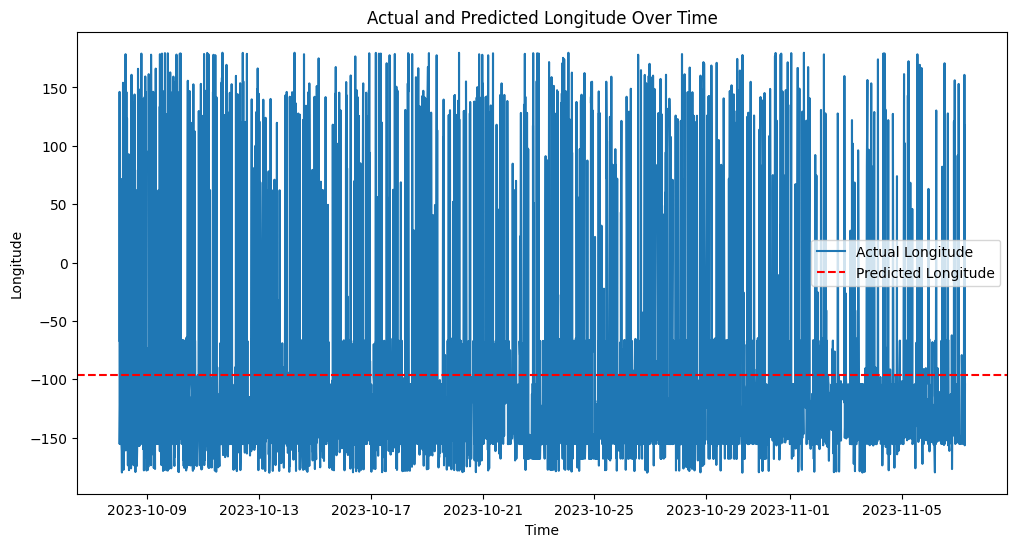

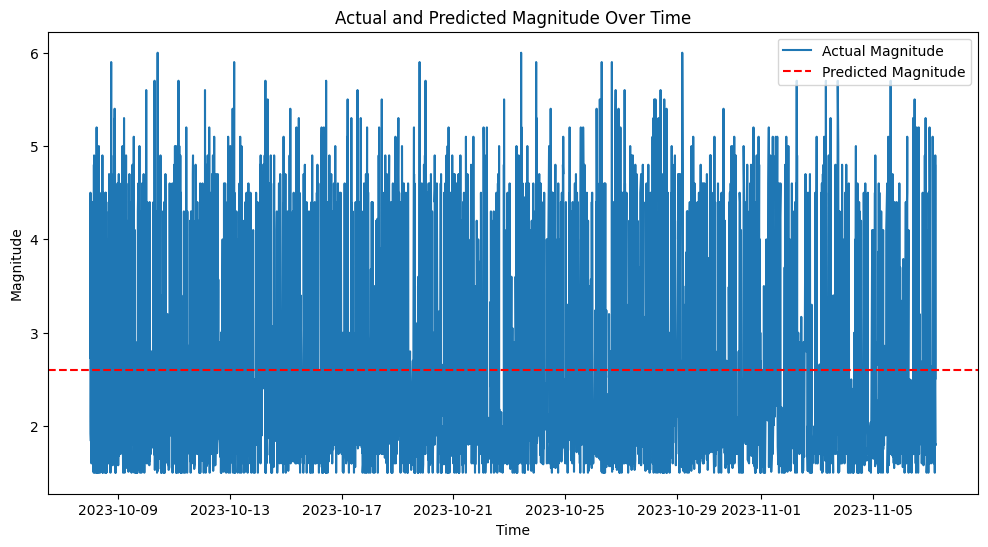

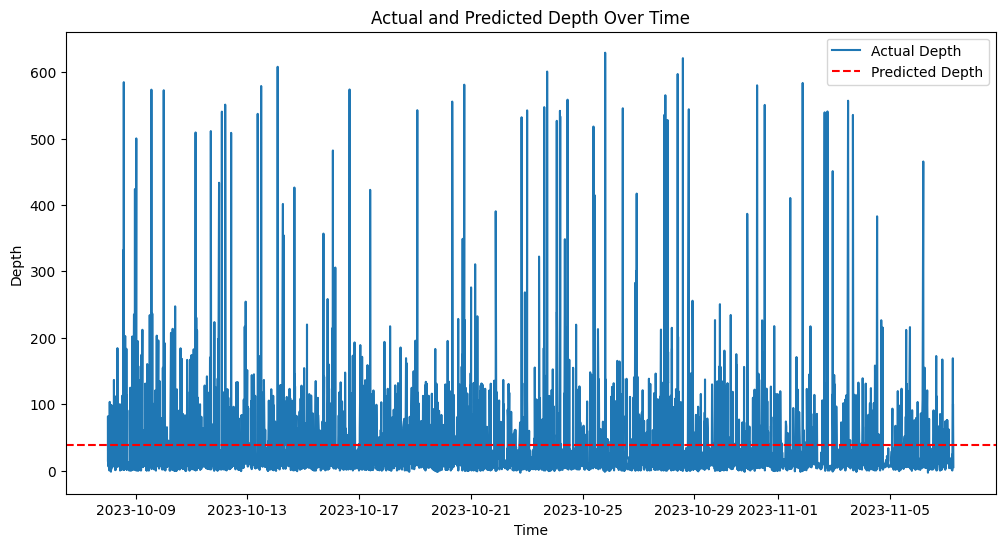

In [42]:
# Visualize actual and predicted latitude
plt.figure(figsize=(12, 6))
plt.plot(latitude_series.index, latitude_series, label='Actual Latitude')
plt.axhline(y=predicted_latitude, color='red', linestyle='--', label='Predicted Latitude')
plt.title('Actual and Predicted Latitude Over Time')
plt.xlabel('Time')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualize actual and predicted longitude
plt.figure(figsize=(12, 6))
plt.plot(longitude_series.index, longitude_series, label='Actual Longitude')
plt.axhline(y=predicted_longitude, color='red', linestyle='--', label='Predicted Longitude')
plt.title('Actual and Predicted Longitude Over Time')
plt.xlabel('Time')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# Visualize actual and predicted magnitude
plt.figure(figsize=(12, 6))
plt.plot(df.index, mag_series, label='Actual Magnitude')
plt.axhline(y=predicted_mag, color='red', linestyle='--', label='Predicted Magnitude')
plt.title('Actual and Predicted Magnitude Over Time')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

# Visualize actual and predicted depth
plt.figure(figsize=(12, 6))
plt.plot(df.index, depth_series, label='Actual Depth')
plt.axhline(y=predicted_depth, color='red', linestyle='--', label='Predicted Depth')
plt.title('Actual and Predicted Depth Over Time')
plt.xlabel('Time')
plt.ylabel('Depth')
plt.legend()
plt.show()